In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
%cd ../experiments/vgg_nr_tuning/2021-04-24-16-40/

/Users/samuilstoychev/Desktop/research_project_repo/research_project/experiments/vgg_nr_tuning/2021-04-24-16-40


In [5]:
!ls

1000_1000_0 1000_200_0  2000_1000_0 2000_200_0  3000_1000_0 3000_200_0
1000_1000_1 1000_200_1  2000_1000_1 2000_200_1  3000_1000_1 3000_200_1
1000_1000_2 1000_200_2  2000_1000_2 2000_200_2  3000_1000_2 3000_200_2
1000_1500_0 1000_500_0  2000_1500_0 2000_500_0  3000_1500_0 3000_500_0
1000_1500_1 1000_500_1  2000_1500_1 2000_500_1  3000_1500_1 3000_500_1
1000_1500_2 1000_500_2  2000_1500_2 2000_500_2  3000_1500_2 3000_500_2


In [6]:
logs = !ls 

In [7]:
class Metrics: 
    def __init__(self, logs): 
        self.logs = logs 
        self.raw_metrics = self.calculate_metrics(logs)
        
    def extract_metrics(self, filename): 
        f = open(filename, 'r')
        lines = f.readlines() 
        gpu_usage = None
        gpu_mem = None
        for line in lines: 
            if "=> Average precision" in line: 
                accuracy = float(line.split(" ")[-1])
            if "=> Total training time" in line: 
                training_time = float(line.split(" ")[-2])
            if "GPU BEFORE EVALUATION:" in line: 
                gpu_usage, gpu_mem = eval(line[22:])
        return (accuracy, training_time, gpu_usage, gpu_mem)
    
    def calculate_metrics(self, files): 
        metrics = dict()

        for file in files: 
            iters, g_fc_uni, _ = file.split("_")
            iters = int(iters)
            g_fc_uni = int(g_fc_uni)
            if (iters, g_fc_uni) in metrics: 
                metrics[(iters, g_fc_uni)].append(self.extract_metrics(file))
            else: 
                metrics[(iters, g_fc_uni)] = [self.extract_metrics(file)] 

        return metrics
    
    def get_metrics_df(self): 
        rows = []
        for key in self.raw_metrics: 
            vals = self.raw_metrics[key]
            rows.append([key[0], key[1]] + [np.mean(x) for x in list(zip(*vals))])
        return pd.DataFrame(rows, columns=["iters", "buffer_size", "Accuracy", "Training time (s)", "GPU Usage (%)", "GPU Memory (MB)"])
            

In [8]:
metrics = Metrics(logs)
df = metrics.get_metrics_df()
df

,iters,buffer_size,Accuracy,Training time (s),GPU Usage (%),GPU Memory (MB)
0,1000,1000,0.800267,711.100000,23.788993,2226.000000
1,1000,1500,0.640767,710.266667,24.261607,2719.333333
2,1000,200,0.765567,712.633333,23.662037,1034.000000
3,1000,500,0.628500,706.233333,24.207804,1348.666667
4,2000,1000,0.717400,1452.133333,23.689843,2063.333333
5,2000,1500,0.725233,1451.433333,22.929208,2759.333333
6,2000,200,0.680133,1432.100000,23.652226,1034.000000
7,2000,500,0.721267,1454.766667,23.484424,1343.333333
8,3000,1000,0.815467,2177.733333,23.391393,2156.666667
9,3000,1500,0.728133,2189.333333,22.861462,2826.000000


In [13]:
metrics.raw_metrics[(1000, 500)]

[(0.738, 695.4, 25.442857142857143, 1338),
 (0.7792, 710.4, 24.23611111111111, 1338),
 (0.3683, 712.9, 22.944444444444443, 1370)]

# NR: Accuracy

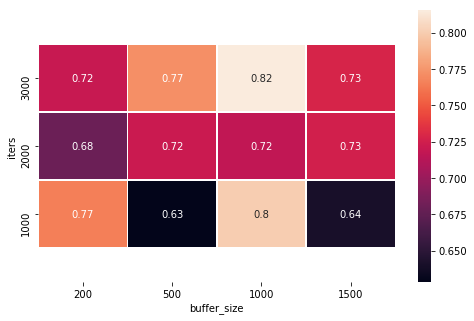

In [9]:
fig, ax = plt.subplots(figsize=(8, 5))         # Sample figsize in inches
sns.heatmap(df.pivot('iters','buffer_size','Accuracy'), annot=True, linewidths=.5, ax=ax)

# Source for the code below: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
ax.invert_yaxis()

plt.show() 

# NR: GPU Memory Usage (MB)

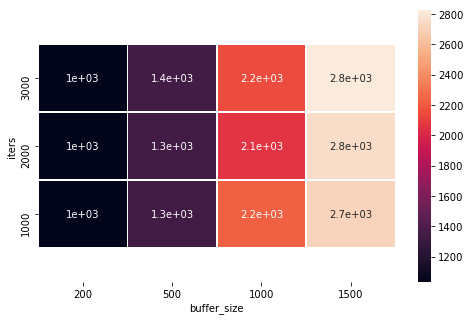

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))         # Sample figsize in inches
sns.heatmap(df.pivot('iters','buffer_size','GPU Memory (MB)'), annot=True, linewidths=.5, ax=ax)

# Source for the code below: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
ax.invert_yaxis()

plt.show() 

# NR: GPU Average GPU Usage (%)

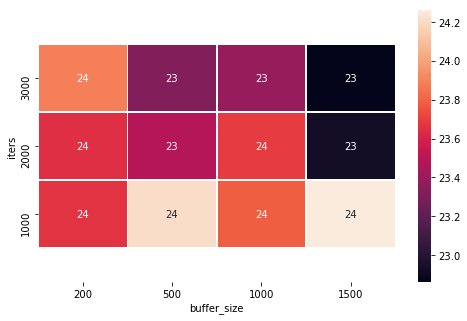

In [11]:
fig, ax = plt.subplots(figsize=(8, 5))         # Sample figsize in inches
sns.heatmap(df.pivot('iters','buffer_size','GPU Usage (%)'), annot=True, linewidths=.5, ax=ax)

# Source for the code below: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
ax.invert_yaxis()

plt.show() 